In [2]:
#importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas.io.sql as sqlio
import psycopg2
from sqlalchemy import create_engine
from pymongo import MongoClient
import psycopg2
import io
import requests
import json
import pymongo
import seaborn as sns
import urllib.parse
import re
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import datetime
from datetime import date
import math
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from random import sample 
import plotly.express as px


%matplotlib inline

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [5]:
 pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


### Fetching the data in json Format

In [2]:
import pandas as pd
from sodapy import Socrata
myclient = Socrata("data.cityofnewyork.us", None)
results = myclient.get("qgea-i56i", limit=10000)

In [3]:
results[0]

{'cmplnt_num': '700381962',
 'cmplnt_fr_dt': '2015-05-28T00:00:00.000',
 'cmplnt_fr_tm': '15:00:00',
 'addr_pct_cd': '46',
 'rpt_dt': '2015-06-01T00:00:00.000',
 'ky_cd': '578',
 'ofns_desc': 'HARRASSMENT 2',
 'pd_cd': '638',
 'pd_desc': 'HARASSMENT,SUBD 3,4,5',
 'crm_atpt_cptd_cd': 'COMPLETED',
 'law_cat_cd': 'VIOLATION',
 'boro_nm': 'BRONX',
 'loc_of_occur_desc': 'INSIDE',
 'prem_typ_desc': 'RESIDENCE - APT. HOUSE',
 'juris_desc': 'N.Y. POLICE DEPT',
 'jurisdiction_code': '0',
 'housing_psa': 'NA',
 'x_coord_cd': '1007522',
 'y_coord_cd': '247458',
 'susp_age_group': '25-44',
 'susp_race': 'BLACK',
 'susp_sex': 'M',
 'latitude': '40.84586773',
 'longitude': '-73.915888033',
 'lat_lon': {'latitude': '40.84586773', 'longitude': '-73.915888033'},
 'patrol_boro': 'PATROL BORO BRONX',
 'vic_age_group': '25-44',
 'vic_race': 'WHITE HISPANIC',
 'vic_sex': 'F',
 ':@computed_region_efsh_h5xi': '10930',
 ':@computed_region_f5dn_yrer': '6',
 ':@computed_region_yeji_bk3q': '5',
 ':@computed_regi

In [4]:
type(results)

list

In [5]:
results_df = pd.DataFrame.from_records(results)
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
cmplnt_num                     10000 non-null object
cmplnt_fr_dt                   10000 non-null object
cmplnt_fr_tm                   10000 non-null object
addr_pct_cd                    9999 non-null object
rpt_dt                         10000 non-null object
ky_cd                          10000 non-null object
ofns_desc                      9982 non-null object
pd_cd                          9992 non-null object
pd_desc                        9992 non-null object
crm_atpt_cptd_cd               10000 non-null object
law_cat_cd                     10000 non-null object
boro_nm                        9992 non-null object
loc_of_occur_desc              7959 non-null object
prem_typ_desc                  9958 non-null object
juris_desc                     10000 non-null object
jurisdiction_code              9992 non-null object
housing_psa                    9999 non-null object


In [6]:
results[0]['cmplnt_fr_dt'][:10]

'2015-05-28'

In [7]:
type(results)

list

### Inserting data into mongodb

In [13]:
mongo_del= mycolumn.remove()

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


In [14]:
myclient = MongoClient("mongodb://34.246.173.115:27017/")
myDatabase = myclient['dap_project_d']

In [15]:
print(myclient.list_database_names())

['admin', 'config', 'dap', 'dap_project_d', 'local']


In [16]:
# assigning col to database
mycolumn = myDatabase["New_York"]

In [17]:
x = mycolumn.insert_many(results)
print(x.inserted_ids)

[ObjectId('5ff892f36880ca97a30a02e4'), ObjectId('5ff892f36880ca97a30a02e5'), ObjectId('5ff892f36880ca97a30a02e6'), ObjectId('5ff892f36880ca97a30a02e7'), ObjectId('5ff892f36880ca97a30a02e8'), ObjectId('5ff892f36880ca97a30a02e9'), ObjectId('5ff892f36880ca97a30a02ea'), ObjectId('5ff892f36880ca97a30a02eb'), ObjectId('5ff892f36880ca97a30a02ec'), ObjectId('5ff892f36880ca97a30a02ed'), ObjectId('5ff892f36880ca97a30a02ee'), ObjectId('5ff892f36880ca97a30a02ef'), ObjectId('5ff892f36880ca97a30a02f0'), ObjectId('5ff892f36880ca97a30a02f1'), ObjectId('5ff892f36880ca97a30a02f2'), ObjectId('5ff892f36880ca97a30a02f3'), ObjectId('5ff892f36880ca97a30a02f4'), ObjectId('5ff892f36880ca97a30a02f5'), ObjectId('5ff892f36880ca97a30a02f6'), ObjectId('5ff892f36880ca97a30a02f7'), ObjectId('5ff892f36880ca97a30a02f8'), ObjectId('5ff892f36880ca97a30a02f9'), ObjectId('5ff892f36880ca97a30a02fa'), ObjectId('5ff892f36880ca97a30a02fb'), ObjectId('5ff892f36880ca97a30a02fc'), ObjectId('5ff892f36880ca97a30a02fd'), ObjectId('5

In [18]:
temp = []

for x in mycolumn.find({},{'_id':1,'cmplnt_num':1,'cmplnt_fr_dt':1, 'cmplnt_fr_tm':1,'cmplnt_to_dt':1,'cmplnt_to_tm':1,
                        'addr_pct_cd':1,'rpt_dt':1,'ky_cd':1,'ofns_desc':1,'pd_cd':1,'pd_desc':1,'crm_atpt_cptd_cd':1,
                           'law_cat_cd':1,'boro_nm':1,'loc_of_occur_desc':1,'prem_typ_desc':1,'juris_desc':1,'jurisdiction_code':1,
                          'parks_nm':1,'hadevelopt':1,'housing_psa':1,'x_coord_cd':1,'y_coord_cd':1,'susp_age_group':1,
                          'susp_race':1,'susp_sex':1,'transit_district':1,'latitude':1,'longitude':1,'lat_lon':1,'patrol_boro':1,
                          'station_name':1,'vic_age_group':1,'vic_race':1,'vic_sex':1}):
    temp.append(x)

In [19]:
# converting into dataframe
import pandas as pd
df = pd.DataFrame(temp)
print(df)

                           _id cmplnt_num             cmplnt_fr_dt  \
0     5ff892f36880ca97a30a02e4  700381962  2015-05-28T00:00:00.000   
1     5ff892f36880ca97a30a02e5  642234217  2013-10-28T00:00:00.000   
2     5ff892f36880ca97a30a02e6  242465164  2012-05-09T00:00:00.000   
3     5ff892f36880ca97a30a02e7  927207428  2014-01-03T00:00:00.000   
4     5ff892f36880ca97a30a02e8  492142357  2016-04-13T00:00:00.000   
...                        ...        ...                      ...   
9995  5ff892f36880ca97a30a29ef  897838805  2012-05-22T00:00:00.000   
9996  5ff892f36880ca97a30a29f0  304648381  2014-08-18T00:00:00.000   
9997  5ff892f36880ca97a30a29f1  878809964  2015-08-04T00:00:00.000   
9998  5ff892f36880ca97a30a29f2  125170961  2014-01-14T00:00:00.000   
9999  5ff892f36880ca97a30a29f3  622035840  2015-07-03T00:00:00.000   

     cmplnt_fr_tm addr_pct_cd                   rpt_dt ky_cd  \
0        15:00:00          46  2015-06-01T00:00:00.000   578   
1        13:50:00         120  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
_id                  10000 non-null object
cmplnt_num           10000 non-null object
cmplnt_fr_dt         10000 non-null object
cmplnt_fr_tm         10000 non-null object
addr_pct_cd          9999 non-null object
rpt_dt               10000 non-null object
ky_cd                10000 non-null object
ofns_desc            9982 non-null object
pd_cd                9992 non-null object
pd_desc              9992 non-null object
crm_atpt_cptd_cd     10000 non-null object
law_cat_cd           10000 non-null object
boro_nm              9992 non-null object
loc_of_occur_desc    7959 non-null object
prem_typ_desc        9958 non-null object
juris_desc           10000 non-null object
jurisdiction_code    9992 non-null object
housing_psa          9999 non-null object
x_coord_cd           10000 non-null object
y_coord_cd           10000 non-null object
susp_age_group       3872 non-null object

In [21]:
# checking the missing values in percentage
perc_miss = df.isnull().sum() * 100 / len(df)
perc_miss

_id                   0.00
cmplnt_num            0.00
cmplnt_fr_dt          0.00
cmplnt_fr_tm          0.00
addr_pct_cd           0.01
rpt_dt                0.00
ky_cd                 0.00
ofns_desc             0.18
pd_cd                 0.08
pd_desc               0.08
crm_atpt_cptd_cd      0.00
law_cat_cd            0.00
boro_nm               0.08
loc_of_occur_desc    20.41
prem_typ_desc         0.42
juris_desc            0.00
jurisdiction_code     0.08
housing_psa           0.01
x_coord_cd            0.00
y_coord_cd            0.00
susp_age_group       61.28
susp_race            42.98
susp_sex             42.98
latitude              0.00
longitude             0.00
lat_lon               0.00
patrol_boro           0.08
vic_age_group        20.63
vic_race              0.00
vic_sex               0.00
cmplnt_to_dt         19.31
cmplnt_to_tm         19.22
parks_nm             62.89
hadevelopt           94.98
transit_district     97.71
station_name         97.71
dtype: float64

### Connect to postgres 

In [3]:
#database is created in postgreSQL
try:
    dbConnection = psycopg2.connect(
        user = 'dap',
        password = 'dap',
        host = '34.246.173.115',
        port = '5432', #universalport
        database = 'postgres')
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connection", dbError)

print('Successfull')    


Successfull


In [23]:
# dropping table and in dapgroupd database
table_colm = """
DROP TABLE crime
"""

try:
    dbCursor.execute(table_colm)
except (Exception, psycopg2.Error) as dbError:
    print('error for connection', dbError)

print('Successfull')

Successfull


In [24]:
# creating table and in dapgroupd database
table_colm = """
CREATE TABLE crime(
     cmplnt_num integer,
     cmplnt_fr_dt timestamp NOT NULL,
     cmplnt_fr_tm varchar(1000),
     addr_pct_cd integer NOT NULL,
     ky_cd integer,
     crm_atpt_cptd_cd varchar(1000),
     law_cat_cd varchar(1000),
     vic_race varchar(1000),
     vic_sex varchar(1000)
     
);
"""

try:
    dbCursor.execute(table_colm)
except (Exception, psycopg2.Error) as dbError:
    print('error for connection', dbError)

print('Successfull')

Successfull


In [25]:
# crime data is being inserted in the form of table
int_string = "INSERT INTO crime VALUES({cmplnt_num},'{cmplnt_fr_dt}','{cmplnt_fr_tm}',{addr_pct_cd},{ky_cd},'{crm_atpt_cptd_cd}','{law_cat_cd}','{vic_race}','{vic_sex}')"

for c in mycolumn.find():
    try:
        Complaint_Number = c['cmplnt_num']
        Complaint_date = c['cmplnt_fr_dt']
        Complaint_time = c['cmplnt_fr_tm']
        ADDR_occ = c['addr_pct_cd']
        Crime_key_Code = c['ky_cd']
        crm_atpt_cptd_cd = c['crm_atpt_cptd_cd']
        Law_code = c['law_cat_cd']
        victim_race = c['vic_race']
        victim_sex = c['vic_sex']
        
        int_string1 = int_string.format(cmplnt_num=Complaint_Number, cmplnt_fr_dt=Complaint_date, cmplnt_fr_tm=Complaint_time, addr_pct_cd= ADDR_occ,
                                        ky_cd=Crime_key_Code,crm_atpt_cptd_cd=crm_atpt_cptd_cd, law_cat_cd=Law_code,
                                        vic_race=victim_race, vic_sex=victim_sex)
        dbCursor.execute(int_string1)
    except:
         print("")
        
print("Successfull")


Successfull


In [5]:
#aquiring postgre data and assigning to df
sql = ''' SELECT * FROM crime; '''
data = pd.read_sql(sql,dbConnection)
df1 = pd.DataFrame(data)
print(df1)

      cmplnt_num cmplnt_fr_dt cmplnt_fr_tm  addr_pct_cd  ky_cd  \
0      700381962   2015-05-28     15:00:00           46    578   
1      642234217   2013-10-28     13:50:00          120    351   
2      242465164   2012-05-09     20:50:00           24    236   
3      927207428   2014-01-03     13:30:00          108    109   
4      492142357   2016-04-13     00:00:00           40    351   
...          ...          ...          ...          ...    ...   
9994   897838805   2012-05-22     16:25:00           46    343   
9995   304648381   2014-08-18     00:40:00           71    235   
9996   878809964   2015-08-04     11:45:00           30    106   
9997   125170961   2014-01-14     17:10:00           75    341   
9998   622035840   2015-07-03     03:00:00           84    344   

     crm_atpt_cptd_cd   law_cat_cd                  vic_race vic_sex  
0           COMPLETED    VIOLATION            WHITE HISPANIC       F  
1           COMPLETED  MISDEMEANOR                     WHITE     

In [6]:
# Splitting the date column into day month and year
df1.cmplnt_fr_dt = pd.to_datetime(df1.cmplnt_fr_dt)

df1['day'] = df1['cmplnt_fr_dt'].dt.day
df1['month'] = df1['cmplnt_fr_dt'].dt.month
df1['year'] = df1['cmplnt_fr_dt'].dt.year

print(df1)


      cmplnt_num cmplnt_fr_dt cmplnt_fr_tm  addr_pct_cd  ky_cd  \
0      700381962   2015-05-28     15:00:00           46    578   
1      642234217   2013-10-28     13:50:00          120    351   
2      242465164   2012-05-09     20:50:00           24    236   
3      927207428   2014-01-03     13:30:00          108    109   
4      492142357   2016-04-13     00:00:00           40    351   
...          ...          ...          ...          ...    ...   
9994   897838805   2012-05-22     16:25:00           46    343   
9995   304648381   2014-08-18     00:40:00           71    235   
9996   878809964   2015-08-04     11:45:00           30    106   
9997   125170961   2014-01-14     17:10:00           75    341   
9998   622035840   2015-07-03     03:00:00           84    344   

     crm_atpt_cptd_cd   law_cat_cd                  vic_race vic_sex  day  \
0           COMPLETED    VIOLATION            WHITE HISPANIC       F   28   
1           COMPLETED  MISDEMEANOR                   

### EDA

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
cmplnt_num          9999 non-null int64
cmplnt_fr_dt        9999 non-null datetime64[ns]
cmplnt_fr_tm        9999 non-null object
addr_pct_cd         9999 non-null int64
ky_cd               9999 non-null int64
crm_atpt_cptd_cd    9999 non-null object
law_cat_cd          9999 non-null object
vic_race            9999 non-null object
vic_sex             9999 non-null object
day                 9999 non-null int64
month               9999 non-null int64
year                9999 non-null int64
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 937.5+ KB


In [8]:
df1.isnull().any()

cmplnt_num          False
cmplnt_fr_dt        False
cmplnt_fr_tm        False
addr_pct_cd         False
ky_cd               False
crm_atpt_cptd_cd    False
law_cat_cd          False
vic_race            False
vic_sex             False
day                 False
month               False
year                False
dtype: bool

In [55]:
df1.shape

(11999, 12)

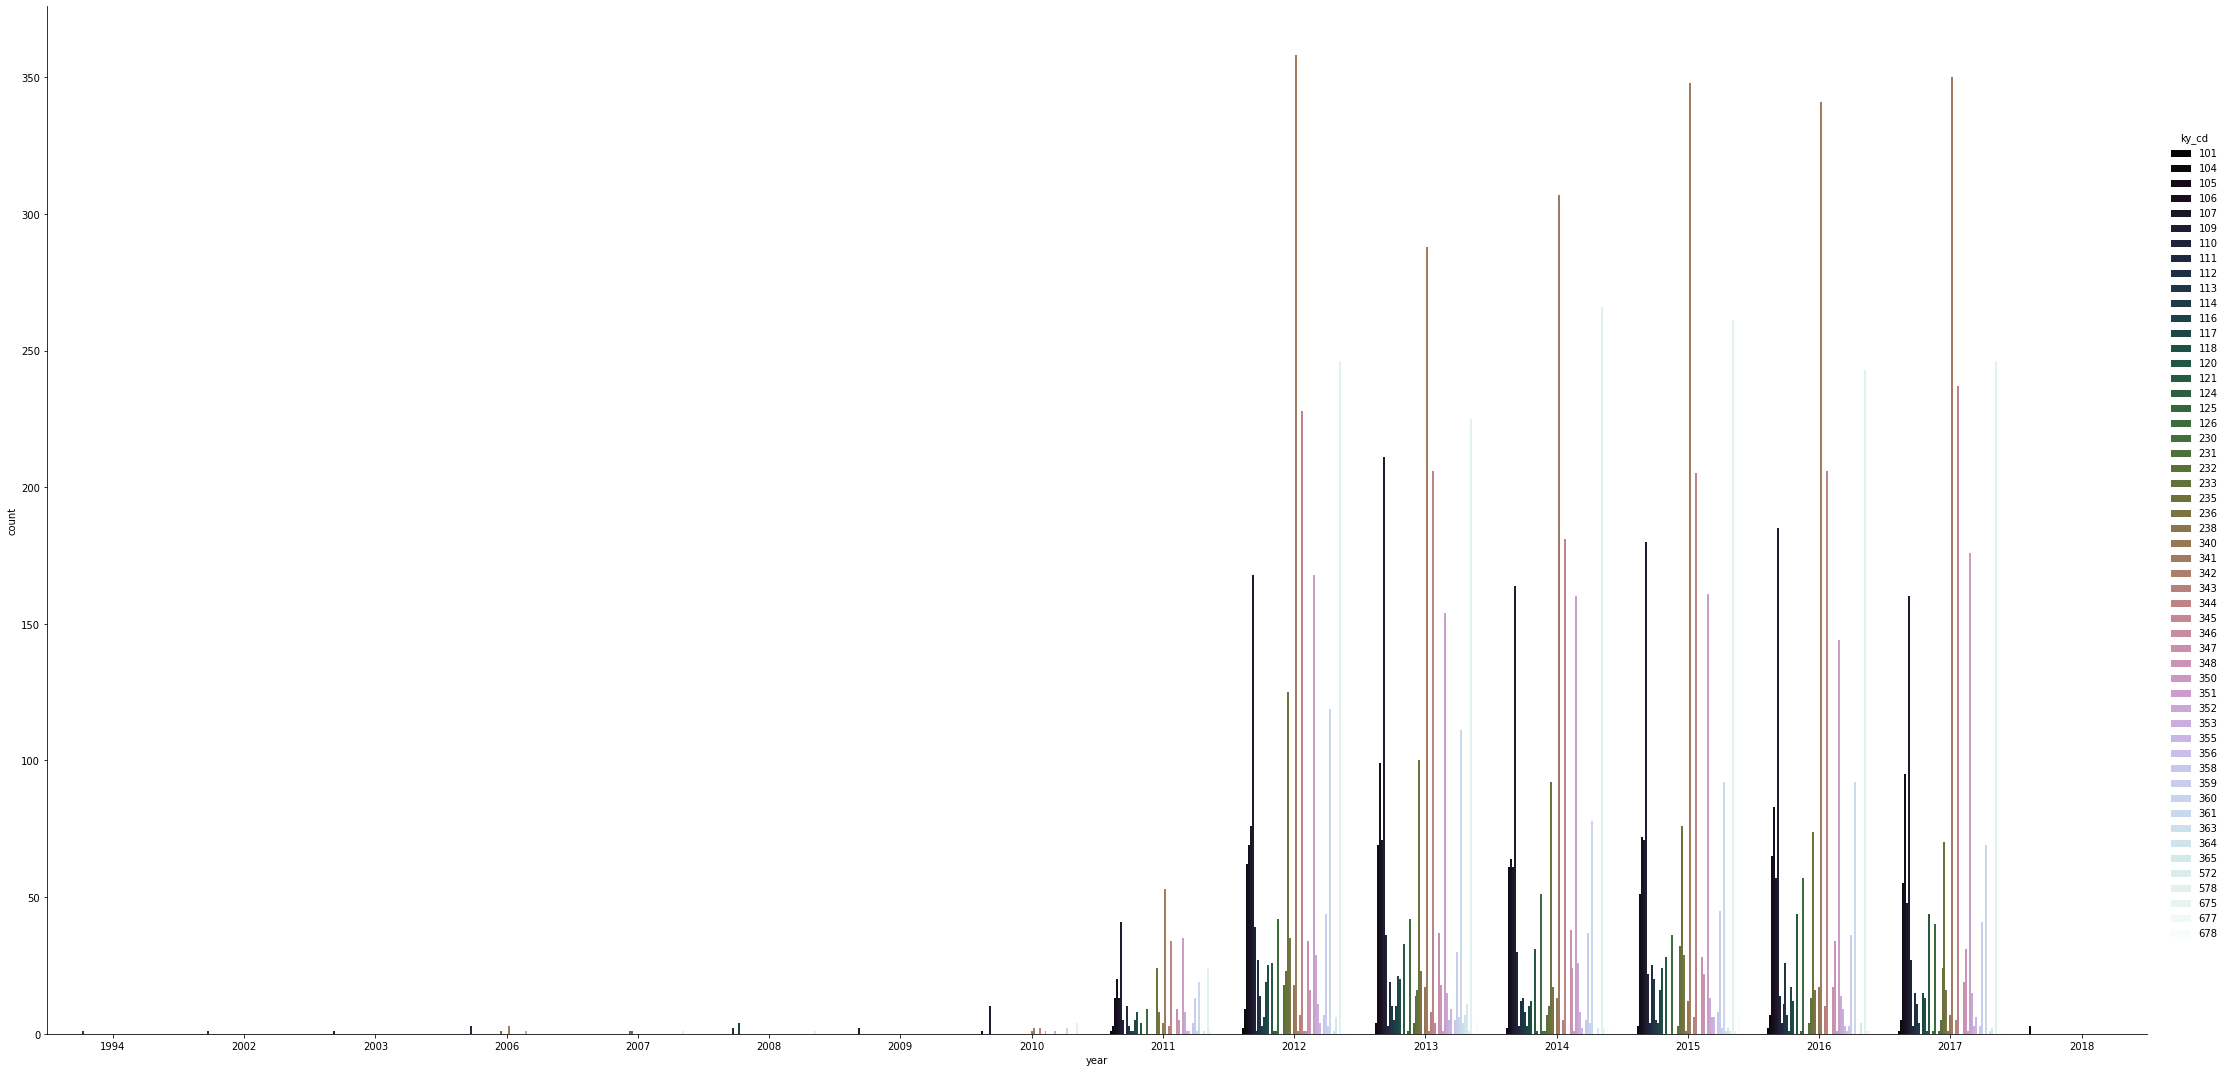

In [56]:
ax = sns.catplot(x="year", hue="ky_cd", kind="count",palette="cubehelix", data=df1, height=15, aspect=2)

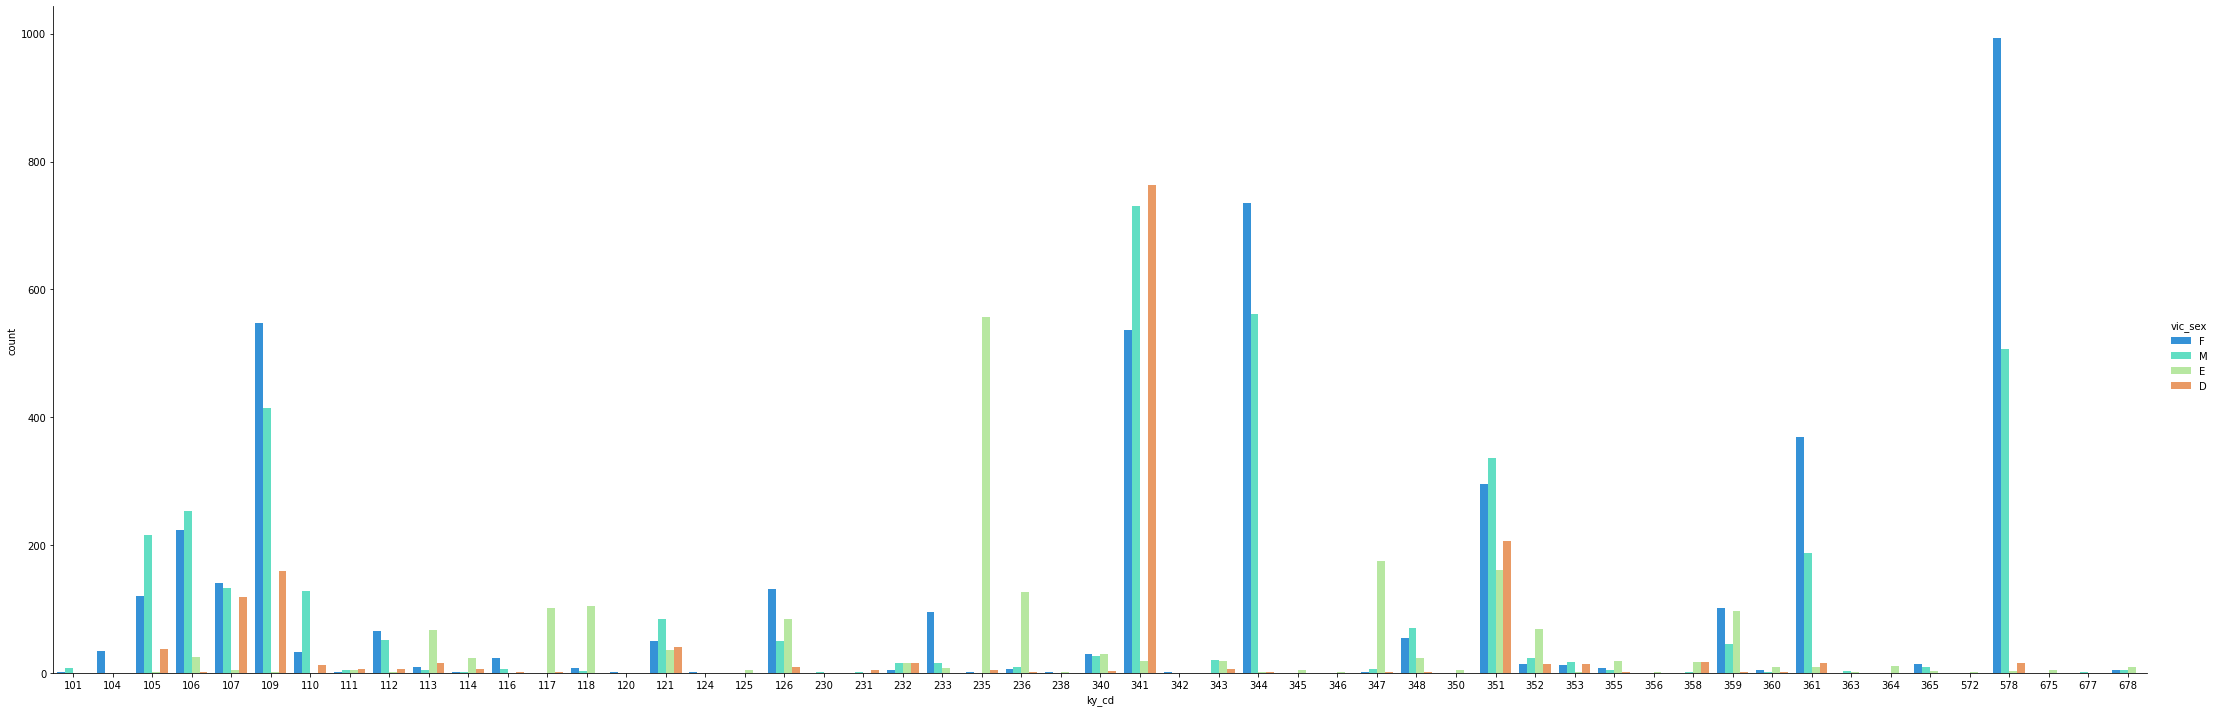

In [57]:
ax = sns.catplot(x="ky_cd", hue="vic_sex", kind="count",palette="rainbow", data=df1, height=10, aspect = 3)

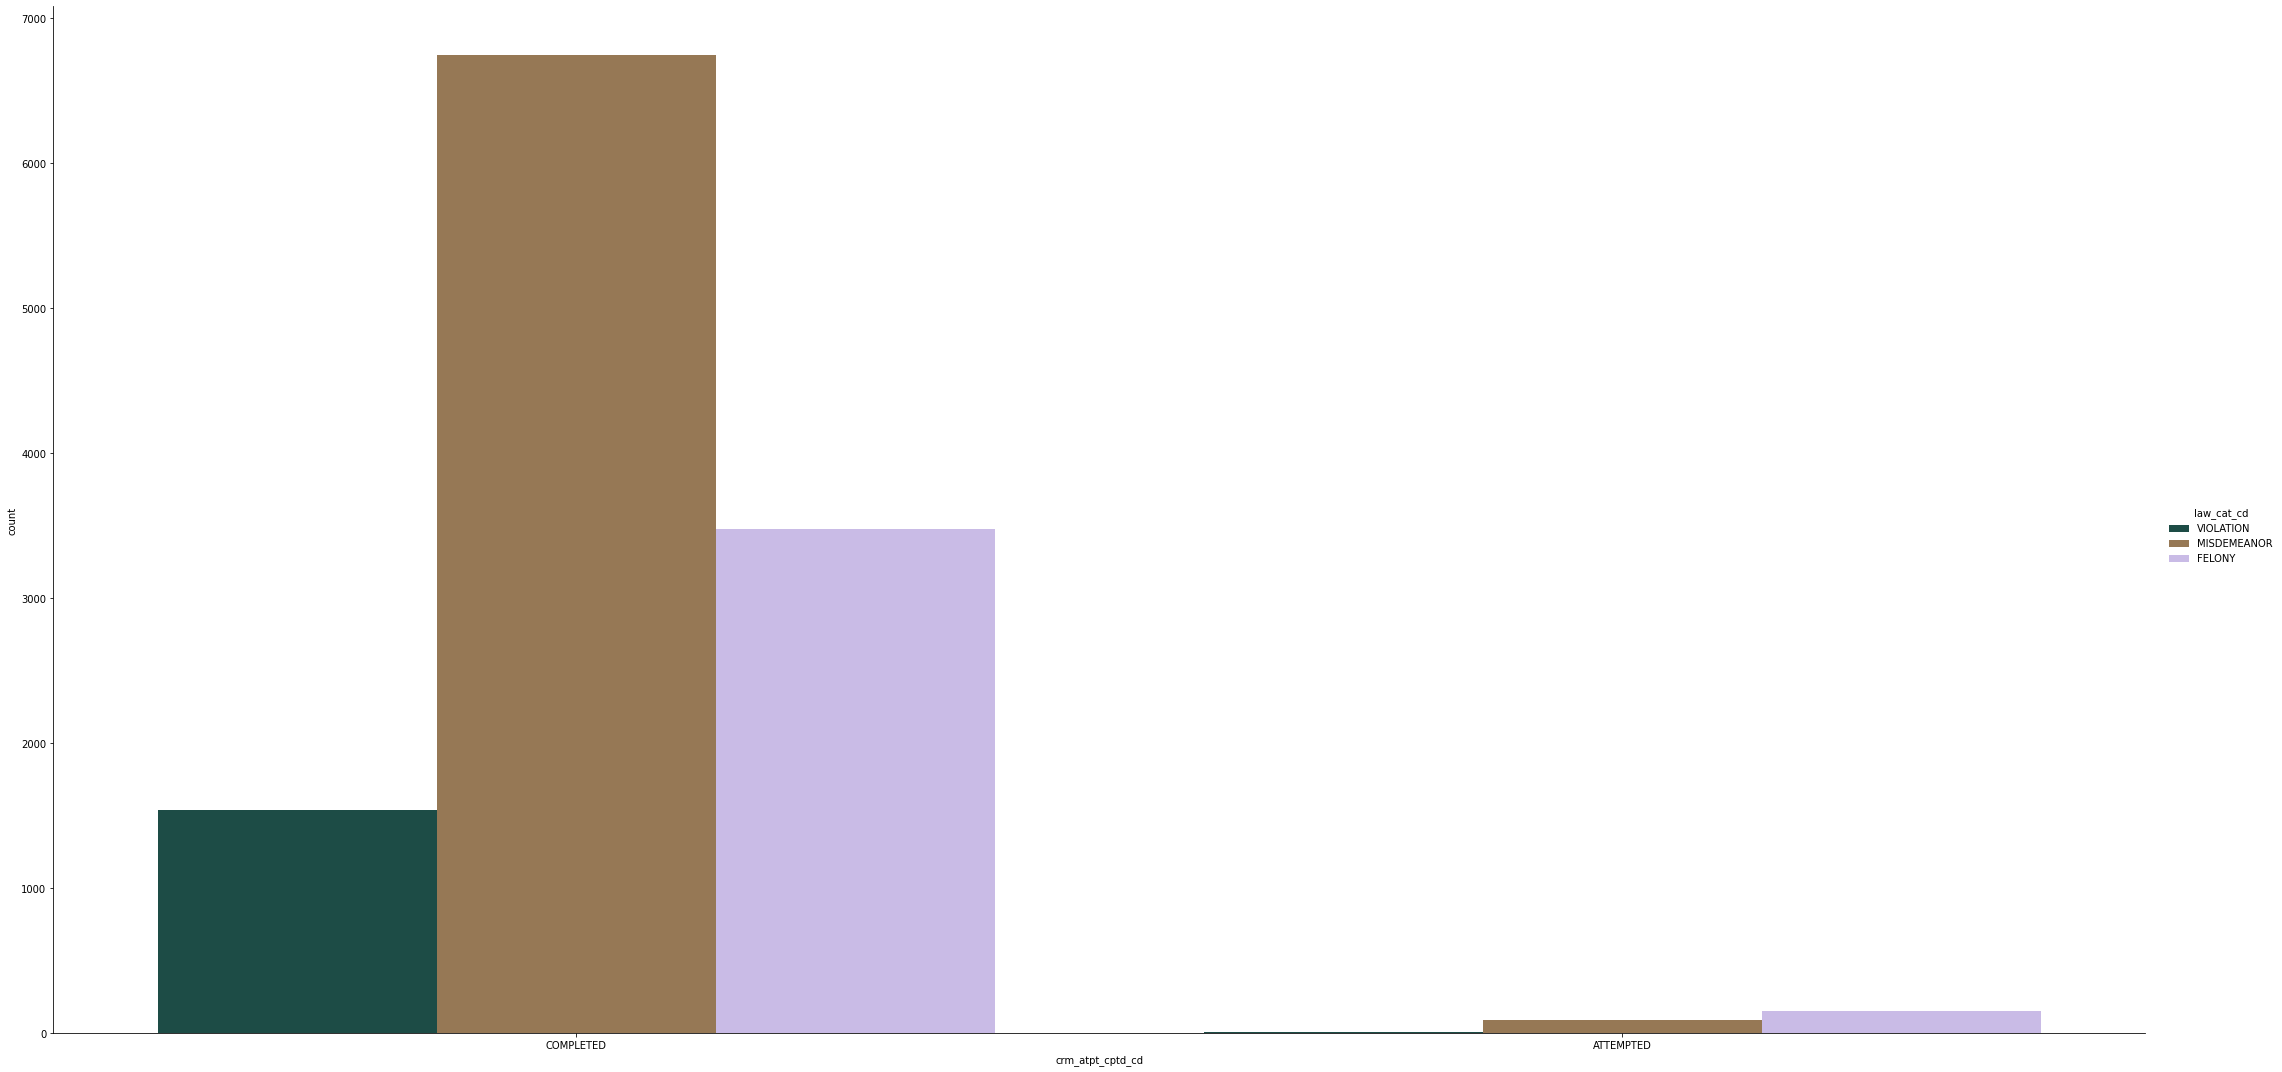

In [58]:
ax = sns.catplot(x="crm_atpt_cptd_cd", hue="law_cat_cd", kind="count",palette="cubehelix", data=df1, height=15, aspect=2)

In [59]:
from collections import Counter


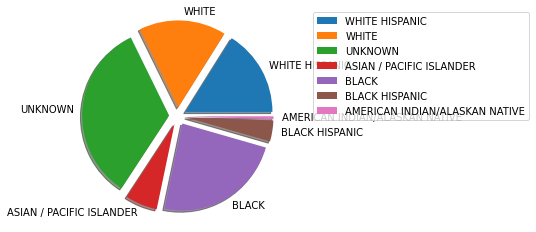

In [60]:
plt.pie(list(dict(Counter(df1.vic_race)).values()),
labels = list(dict(Counter(df1.vic_race)).keys()),
shadow = True,
startangle = 0,
explode = (0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1));
plt.legend(list(dict(Counter(df1.vic_race)).keys()),loc = 2, bbox_to_anchor=(1.1, 1))
plt.show()

In [9]:
#aquiring postgre data and assigning to df
sql = ''' SELECT * FROM weather; '''
data = pd.read_sql(sql,dbConnection)
df2 = pd.DataFrame(data)
print(df2)

                             name    datetime  maximumtemperature  \
0     New York, NY, United States  2013-01-01                40.1   
1     New York, NY, United States  2013-01-02                33.1   
2     New York, NY, United States  2013-01-03                33.1   
3     New York, NY, United States  2013-01-04                37.0   
4     New York, NY, United States  2013-01-05                42.4   
...                           ...         ...                 ...   
2155  New York, NY, United States  2019-11-22                52.6   
2156  New York, NY, United States  2019-11-23                46.0   
2157  New York, NY, United States  2019-11-25                53.1   
2158  New York, NY, United States  2019-11-26                62.8   
2159  New York, NY, United States  2019-12-01                39.7   

      minimumtemperature  temperature  windspeed  windgust  visibility  \
0                   28.9         37.6       17.2      21.9         9.9   
1                   24.

In [10]:
df1['cmplnt_fr_dt'] = pd.to_datetime(df1['cmplnt_fr_dt']).dt.date

In [11]:
df1_crime = df1.rename(columns = {'cmplnt_fr_dt' : 'Date'})

In [12]:
df2_wth = df2.rename(columns = {'datetime' : 'Date'})

In [13]:
df3_crm_wth = df1_crime.merge(df2_wth, on = 'Date')
df3_crm_wth

,cmplnt_num,Date,cmplnt_fr_tm,addr_pct_cd,ky_cd,crm_atpt_cptd_cd,law_cat_cd,vic_race,vic_sex,day,...,name,maximumtemperature,minimumtemperature,temperature,windspeed,windgust,visibility,cloudcover,relativehumidity,conditions
0,700381962,2015-05-28,15:00:00,46,578,COMPLETED,VIOLATION,WHITE HISPANIC,F,28,...,"New York, NY, United States",84.4,70.1,76.8,8.4,23.0,8.1,43.1,67.48,Partially cloudy
1,340237266,2015-05-28,06:40:00,103,107,COMPLETED,FELONY,BLACK,F,28,...,"New York, NY, United States",84.4,70.1,76.8,8.4,23.0,8.1,43.1,67.48,Partially cloudy
2,123511143,2015-05-28,00:01:00,104,109,COMPLETED,FELONY,UNKNOWN,D,28,...,"New York, NY, United States",84.4,70.1,76.8,8.4,23.0,8.1,43.1,67.48,Partially cloudy
3,369516385,2015-05-28,12:00:00,47,578,COMPLETED,VIOLATION,BLACK,F,28,...,"New York, NY, United States",84.4,70.1,76.8,8.4,23.0,8.1,43.1,67.48,Partially cloudy
4,642234217,2013-10-28,13:50:00,120,351,COMPLETED,MISDEMEANOR,WHITE,M,28,...,"New York, NY, United States",59.7,43.8,52.1,0.9,21.9,9.9,0.0,43.09,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,827550986,2014-01-21,08:34:00,122,361,COMPLETED,MISDEMEANOR,WHITE,F,21,...,"New York, NY, United States",31.9,11.1,20.7,1.2,36.9,0.9,0.6,67.32,Clear
7056,802210021,2017-04-07,21:40:00,13,109,COMPLETED,FELONY,BLACK HISPANIC,F,7,...,"New York, NY, United States",50.2,42.1,46.0,16.5,50.1,9.9,9.7,64.92,Rain
7057,209766516,2015-05-12,13:00:00,120,341,COMPLETED,MISDEMEANOR,ASIAN / PACIFIC ISLANDER,F,12,...,"New York, NY, United States",84.8,67.2,76.4,16.1,31.1,8.7,35.1,58.84,Partially cloudy
7058,531269397,2013-01-21,22:00:00,104,110,COMPLETED,FELONY,WHITE,F,21,...,"New York, NY, United States",32.0,27.2,29.6,17.2,19.5,9.9,3.4,43.40,Clear


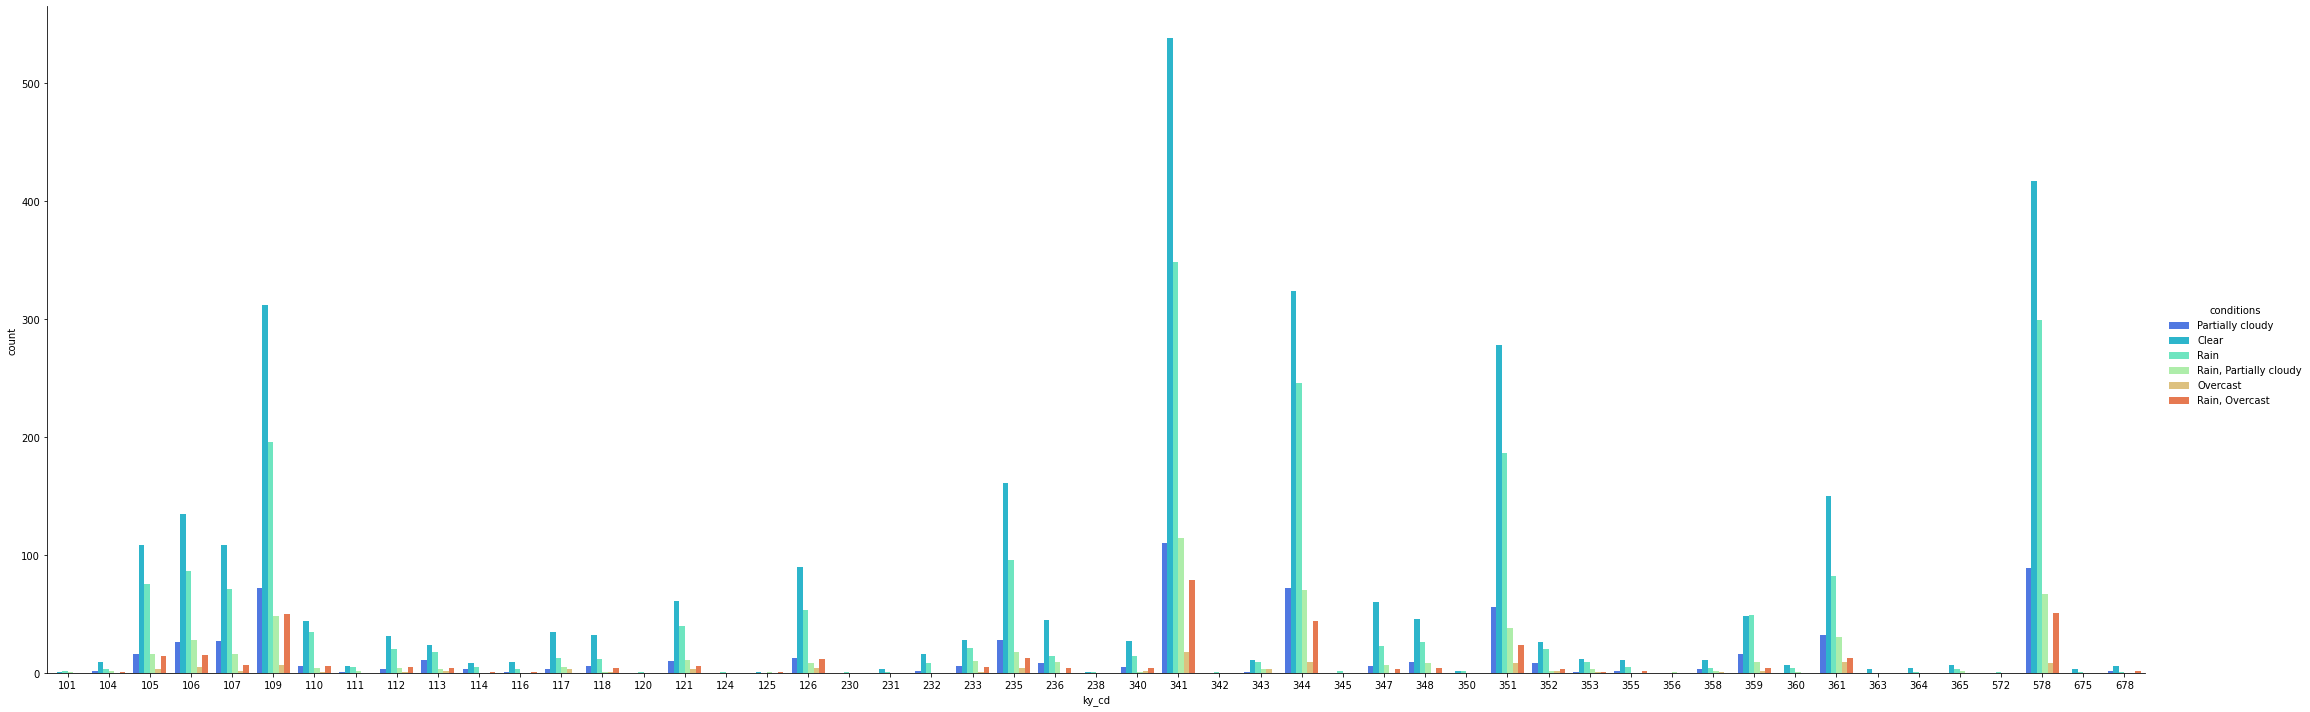

In [14]:
ax = sns.catplot(x="ky_cd", hue="conditions", kind="count",palette="rainbow", data=df3_crm_wth, height=10, aspect = 3)

In [15]:
wc_table = pd.crosstab(index = df3_crm_wth['crm_atpt_cptd_cd'], columns = df3_crm_wth['conditions'])
wc_table

conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
crm_atpt_cptd_cd,,,,,,
ATTEMPTED,63,2,14,45,8,13
COMPLETED,3196,98,642,2072,375,532


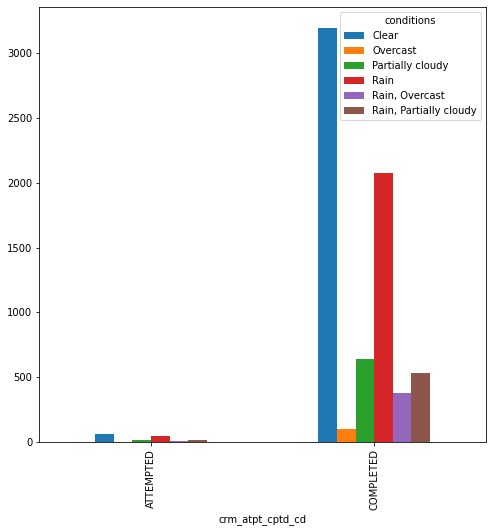

In [16]:
wc_table.plot(kind = 'bar', figsize = (8,8), stacked = False)